### GPT architecture part 3: Feedforward NN with GELU

In [4]:
import torch
import torch.nn as nn

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

In [5]:
### To get an idea of what GELU function looks like and how it compares to the ReLU function, we'll plot the functions
### side by side.

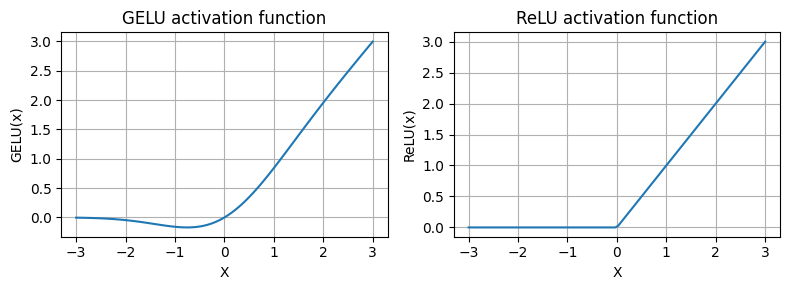

In [6]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("X")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
### As we can see in the plot, ReLU is a piecewise linear function that outputs the input directly if it is positive,
### otherwise, it outputs zero.
### GELU is a smooth, nonlinear function that approximates ReLU but with a non-zero gradient for negative values.

In [9]:
### The smoothness of GELU can lead to better optimization properties during training, as it allows for more nuanced adjustments
### to the model's parameters.
### In contrast, ReLU has a sharp corner at zero, which can sometimes make optimization harder especially in networks that are
### very deep or have complex architectures.
### Moreover, unlike ReLU which outputs zero for any negative input, GELU allows for small, non-zero output for negative values.
### This characteristic means that during the training process, neurons that receive negative input can still contribute to the 
### learning process, albeit to a lesser extent than positive inputs. (avoids the dead neuron problem)

In [11]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-key-value bias
}

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),  # Expansion
            GELU(), # Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),  # Contraction
        )
    
    def forward(self, x):
        return self.layers(x)

In [12]:
print(GPT_CONFIG_124M["emb_dim"])

768


In [13]:
### The FeedForward module is a small neural network consisting of two linear layers and a GELU activation function.
### In the 124 million parameter GPT model, it receives the input batches with tokens that have an embedding size of 768 each

In [14]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [15]:
### the feed forward module we implemented in this section plays a crucial role in enhancing the model's ability to learn from
### and generalize the data.
### although the input and output dimensions of the module are the same, it internally expands the embedding dimension into a higher
### dimensional space through the first linear layer.
### this expansion is followed by a non linear GELU activation, and then a contraction back to the original dimension with the 
### second linear transformation.
### Such a design allows for the exploration of a richer representation space.

In [16]:
### Moreover, the uniformity in input and output dimensions simplifies the architecture by enabling the stacking of multiple
### layers, as we will do later without the need to adjust dimensions between them, thus making the model more scalable.